# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

# Step 1: Load the Datasets from Database

In [169]:
import sqlite3
import pandas as pd

In [170]:
#create connection to sqlite database and see the tables I stores in at last assignment
conn = sqlite3.connect('/Users/johnxie301/Desktop/Data_Science_600/Assignment_7.owala.db')
cursor = conn.cursor()
cursor.execute("SELECT name from sqlite_master WHERE type = 'table'")
cursor.fetchall()

[('owala_posts',), ('new_posts',), ('comments',), ('new_owa',)]

In [171]:
#This week I will be doing sentiment score for both the posts and comments, so I need to pull two tables from the database.
owala_post_df = pd.read_sql_query("SELECT * FROM new_posts",conn)
owala_post_df.head()

,index,title,link,author,n_comments,score,text,id
0,0,Owala Boot,/r/Owala/comments/17346hm/owala_boot/,yuuki_no_,3,2,Trying to find an owala boot. Any owala boot y...,17346hm
1,1,Pissed to say the least,/r/Owala/comments/172pa7n/pissed_to_say_the_le...,Shreksasshole420,7,3,,172pa7n
2,2,Water Bottle Residue Inside,/r/Owala/comments/1714gmh/water_bottle_residue...,Pristine-Can-1403,4,1,As you can tell from the picture there is some...,1714gmh
3,3,Neptune,/r/Owala/comments/170onc0/neptune/,kimribbean,6,1,Anybody order their Neptune bottle from the “c...,170onc0
4,4,Discount/ambassador code,/r/Owala/comments/170kili/discountambassador_c...,Scary_Return_5769,0,1,Does anyone have a ambassador to discount code...,170kili


In [172]:
owala_comments_df = pd.read_sql_query("SELECT * FROM comments",conn)
owala_comments_df.head()

,index,author,score,text,post_id
0,0,silver_thunderstorm,2,The official one in any color you like. You ca...,17346hm
1,1,citrus_baby,1,a sock,17346hm
2,2,drjoshm,1,"I just got these ones, and they fit the 24oz n...",17346hm
3,3,OrdinaryQuestions,7,I've seem multiple posts lately about these bo...,172pa7n
4,4,AlternativeVisit8038,3,It’s real easy to fix.,172pa7n


In [173]:
#We do not need the index column, we will drop them
owala_post_df.drop('index',axis=1,inplace=True)
owala_comments_df.drop('index',axis=1,inplace=True)

In [174]:
owala_post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       100 non-null    object
 1   link        100 non-null    object
 2   author      100 non-null    object
 3   n_comments  100 non-null    int64 
 4   score       100 non-null    int64 
 5   text        100 non-null    object
 6   id          100 non-null    object
dtypes: int64(2), object(5)
memory usage: 5.6+ KB


In [175]:
owala_comments_df.head()

,author,score,text,post_id
0,silver_thunderstorm,2,The official one in any color you like. You ca...,17346hm
1,citrus_baby,1,a sock,17346hm
2,drjoshm,1,"I just got these ones, and they fit the 24oz n...",17346hm
3,OrdinaryQuestions,7,I've seem multiple posts lately about these bo...,172pa7n
4,AlternativeVisit8038,3,It’s real easy to fix.,172pa7n


Tables are all good to go!

# Step 2: Sentiment Analysis (Title)

## Sentiment Analysis: Keyword Method

In [176]:
#import in sentiment text list
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')
sentiment_df.head()
#code source directly from Week_8_FTE.ipynb

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2


In [177]:
#convert this list to dictionary so it is easier to look up the words and easier to write in a for loop
sentiment_dict = sentiment_df.to_dict()['score']
sentiment_dict


{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [178]:
import numpy as np
#create a empty list for storing the mean of title sentiment scores
owala_title_score = []
owala_scored_word = []
#create a for loop to put each title into a separated list of lowercase words and run another for loop to give every word a sentiment score.
for title in owala_post_df['title']:
    #words are list of words in a title
    words = title.lower().split()
    # an empty shell to store score of each word of the title in this loop
    title_sentiment = []
    # I came back from the analysis below to add this part because I want to see if the words that were graded in a sentence.
    word_w_score = []
    #create a another for loop for each word's score
    for w in words:
        #create a if statement to check if they are in the dictionary of sentiment_dict,if not consider it as neutural(which is 0)
        if w in sentiment_dict.keys():
            title_sentiment.append(sentiment_dict[w])
            word_w_score.append(w)
        else: title_sentiment.append(0)
    #now at the end of this loop before we move on to the next title, we get the average score of it and add into owala_title_score
    owala_title_score.append(round(np.mean(title_sentiment),4))
    owala_scored_word.append(word_w_score)


    

In [179]:
#let's see what are words with score used in the titles
owala_scored_word

[[],
 ['pissed'],
 [],
 [],
 [],
 ['best'],
 ['help'],
 ['love'],
 [],
 [],
 [],
 ['missed'],
 [],
 ['support', 'drop'],
 [],
 [],
 ['missed'],
 ['problem'],
 ['top'],
 [],
 [],
 [],
 [],
 [],
 ['clean'],
 [],
 [],
 ['perfectly'],
 [],
 [],
 ['best'],
 [],
 [],
 ['favorite'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['certain'],
 [],
 [],
 ['cool'],
 [],
 ['help'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['exclusive'],
 [],
 [],
 ['kind', 'hate', 'love'],
 [],
 [],
 ['love'],
 [],
 [],
 [],
 ['no'],
 ['please'],
 ['good'],
 [],
 ['favorite'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['super'],
 [],
 ['fire'],
 [],
 [],
 [],
 [],
 ['worth'],
 [],
 [],
 [],
 [],
 [],
 []]

I did see some positive words to describe water bottle brands like 'clean', 'love', 'best'; Also I have seen words with negative emotions used: 'pissed'. I should look at these post titles.

In [180]:
owala_title_score

[0.0,
 -0.8,
 0.0,
 0.0,
 0.0,
 0.3333,
 0.4,
 0.2727,
 0.0,
 0.0,
 0.0,
 -0.1429,
 0.0,
 0.1429,
 0.0,
 0.0,
 -0.4,
 -0.2857,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.1154,
 0.0,
 0.0,
 0.375,
 0.0,
 0.0,
 0.6667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0909,
 0.0,
 0.0,
 0.1667,
 0.0,
 0.6667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2857,
 0.0,
 0.0,
 0.08,
 0.0,
 0.0,
 0.75,
 0.0,
 0.0,
 0.0,
 -0.1,
 0.0417,
 0.4286,
 0.0,
 0.2222,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [181]:
print('Maximum sentiment score is: ',np.max(owala_title_score),'.')
print('Minimum sentiment score is: ',np.min(owala_title_score),'.')


Maximum sentiment score is:  1.0 .
Minimum sentiment score is:  -0.8 .


In [182]:
owala_post_df['sentiment_score'] = owala_title_score
owala_post_df.head()

,title,link,author,n_comments,score,text,id,sentiment_score
0,Owala Boot,/r/Owala/comments/17346hm/owala_boot/,yuuki_no_,3,2,Trying to find an owala boot. Any owala boot y...,17346hm,0.0
1,Pissed to say the least,/r/Owala/comments/172pa7n/pissed_to_say_the_le...,Shreksasshole420,7,3,,172pa7n,-0.8
2,Water Bottle Residue Inside,/r/Owala/comments/1714gmh/water_bottle_residue...,Pristine-Can-1403,4,1,As you can tell from the picture there is some...,1714gmh,0.0
3,Neptune,/r/Owala/comments/170onc0/neptune/,kimribbean,6,1,Anybody order their Neptune bottle from the “c...,170onc0,0.0
4,Discount/ambassador code,/r/Owala/comments/170kili/discountambassador_c...,Scary_Return_5769,0,1,Does anyone have a ambassador to discount code...,170kili,0.0


<Axes: ylabel='Frequency'>

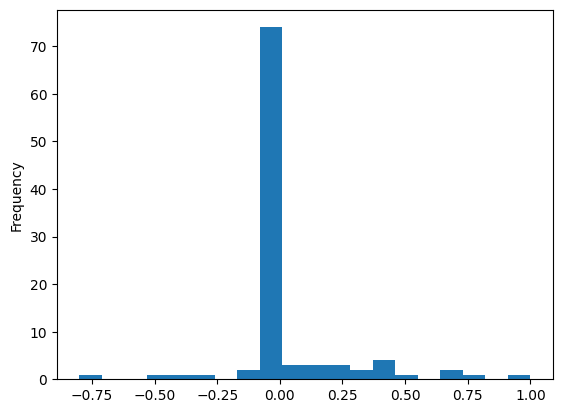

In [183]:
owala_post_df['sentiment_score'].plot.hist(bins=20)

This graph shows that most of the graphs are neutural but slightly towards negative side.

In [184]:
owala_post_df['sentiment_score'].mean()

0.049099

The mean of the whole sentiment are neutural but slightly towards positive side. Both the graphs and the mean gives back similar result as the examples presented in class. 

In [185]:
# we can also look at the titles with negative scores
owala_post_df[['title','sentiment_score']][owala_post_df['sentiment_score'] < 0]

,title,sentiment_score
1,Pissed to say the least,-0.8000
11,Actual customers and fans of Owala missed out ...,-0.1429
16,wah missed lotsa lilac :(,-0.4000
17,Flip Straw Owala has a leaking problem,-0.2857
75,is this an actual color way ? no right ?,-0.1000
88,Fire Hydrant vibes 🧯🔥,-0.5000


In [186]:
sentiment_dict['fire']

-2

We can see that it is not alway accurate. 
e.g.: fire now are used a lot often as a positive word but it is consider a negative word.

## Sentiment Analysis: Textblob Sentiment Analysis

In [187]:
#pip install textblob

In [188]:
# import in attributes
from textblob import TextBlob
# create a function where it will apply text blob to every input(text)
def get_tb_sentiment(text):
    tb = TextBlob(text)
    #return with the polarity score.
    return tb.sentiment[0]
# add a new column to keep the score record by apply the function to the title
owala_post_df['tb_sentiment'] = owala_post_df['title'].apply(get_tb_sentiment)

In [189]:
owala_post_df[['title','sentiment_score','tb_sentiment']][owala_post_df['tb_sentiment'] <0]

,title,sentiment_score,tb_sentiment
1,Pissed to say the least,-0.8000,-0.300000
9,Cosmic glow in the dark,0.0000,-0.150000
16,wah missed lotsa lilac :(,-0.4000,-0.750000
22,Secret Release,0.0000,-0.400000
23,How's my sticker game?,0.0000,-0.400000
27,To sticker or not to sticker that is the quest...,0.1154,-0.500000
36,Other brands with same thread pitch for lid?,0.0000,-0.062500
62,spent all day making this!,0.0000,-0.125000
75,is this an actual color way ? no right ?,-0.1000,-0.071429
86,DISO super subtle!!!,1.0000,-0.158854


Comment: for the titles I see, TextBlob sentiment does not do a better job then word sentiment. I personally can feel strong emotions and negativity from the first title 'pissed to say the least'.I believe it is definitely a 0.8. Also I do not see any negativity in the context of 'secret release' and "how's my sticker game?". I believe these are pretty neutural sentences and textblob marked it as slightly negative. 

<Axes: ylabel='Frequency'>

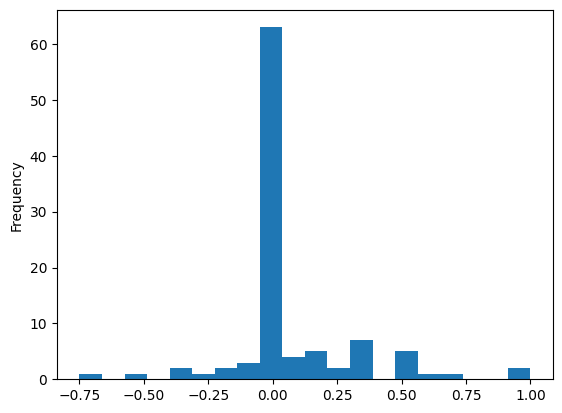

In [190]:
owala_post_df['tb_sentiment'].plot.hist(bins=20)

In [191]:
owala_post_df['tb_sentiment'].mean()

0.06837563582251083

Comment: What we can see comparing the two graphs are that the peak of the histogram moved towards right a little more, still in the netural zone. However, more negative scores appears in textblob sentiment ananlysis. Generally, textblob will put more text under the reviewing radar for us. If we are trying to exclude the negative topics from a online society, we would want to be more inclusive. Even though textblob did not do a really good job, we woulds still prefer to use textblob over text sentiment unless we have a thorough text sentiment score dictionary.

## Sentiment Analysis: Vader Sentiment Analysis

In [192]:
#pip install vaderSentiment

In [193]:
# Try on vader sentiment analysis. according to the internet, vader is the best when it comes to polarity test

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#create a module shortcut
analyzer = SentimentIntensityAnalyzer()
#use polarityscores attributes for it. Same thing, create a function using that 
def vader_sentiment(text):
    vader = analyzer.polarity_scores(text)
    return vader['compound']



In [194]:
# Personal comment: It's crazy what apply is able to do. 
owala_post_df['v_sentiment'] = owala_post_df['title'].apply(vader_sentiment)
owala_post_df[['title','sentiment_score','tb_sentiment','v_sentiment']][owala_post_df['v_sentiment'] < 0]

,title,sentiment_score,tb_sentiment,v_sentiment
1,Pissed to say the least,-0.8000,-0.300000,-0.6369
11,Actual customers and fans of Owala missed out ...,-0.1429,0.000000,-0.2960
16,wah missed lotsa lilac :(,-0.4000,-0.750000,-0.6249
17,Flip Straw Owala has a leaking problem,-0.2857,0.000000,-0.4019
33,least favorite colors?,0.6667,0.100000,-0.3570
75,is this an actual color way ? no right ?,-0.1000,-0.071429,-0.3736
80,Star Wars Owala,0.0000,0.000000,-0.5574
88,Fire Hydrant vibes 🧯🔥,-0.5000,0.000000,-0.7351


Comment: We can definitely see that almost all the negative score by vader sentiment are accurate. But there is one that is really funny: 'Star Wars Owala'. If a star war fan used this method on a star war subreddit topic, He's gonna get so mad of vader sentiment. My guess is that vader sentiment consider 'war' as a negative word. textblob obviously is more caught up to time on context. Another example will be 'fire hydrant vibes /two emoji': I do not know if textblob can anlayze emojis, but I looked up vader and it does analyze the context include capitalization and emojis. Even as a foreigner I know that fire is often to describe something is really good. In vader sentiment analysis it is definitely considered as a negative word, so does its emoji (They give a score of -0.7 on its title).

<Axes: ylabel='Frequency'>

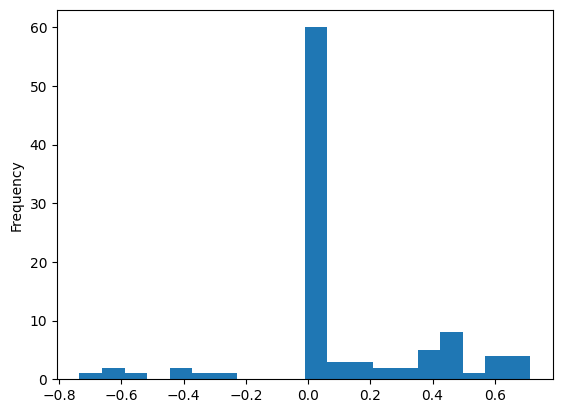

In [195]:
owala_post_df['v_sentiment'].plot.hist(bins=20)

Comment: We can see less slightly negative titles, more at two ends. 

In [196]:
owala_post_df['v_sentiment'].mean()

0.09469799999999999

Still at the netural level, but moved towards right.

Comment: Overall, these methods all have their issues. Some connot detect certain phrase like 'Star Wars'; Some cannot tell the latest definition of words on internet. They should definitely connect to urban dictionary to because new words are created every once a while and new meanings are given to words. I really wonder how natural langauge processing can handle these type of issues. But there are definitely rules we can observe when we have enough data. E.g.: Something is fire usually means something is really nice. In this case fire is not negative or neutural, but strong positive word. 

# Step 3: Sentiment Analysis (Comments)

In [197]:
# Friendly reminder of what the comments table look like :)
owala_comments_df.head()

,author,score,text,post_id
0,silver_thunderstorm,2,The official one in any color you like. You ca...,17346hm
1,citrus_baby,1,a sock,17346hm
2,drjoshm,1,"I just got these ones, and they fit the 24oz n...",17346hm
3,OrdinaryQuestions,7,I've seem multiple posts lately about these bo...,172pa7n
4,AlternativeVisit8038,3,It’s real easy to fix.,172pa7n


## Sentiment Analysis: Keyword Analaysis


In [198]:
# we already have the dictionary for keyword. We will just recreate a loop for comments again
owala_comment_score = []
for text in owala_comments_df['text']:
    word = text.lower().split()
    comment_sentiment = []
    for w in word:
        if w in sentiment_dict.keys():
            comment_sentiment.append(sentiment_dict[w])
        else:
            comment_sentiment.append(0)
    owala_comment_score.append(round(np.mean(comment_sentiment),4))

In [199]:
owala_comments_df['key_sentiment'] = owala_comment_score
owala_comments_df[owala_comments_df['key_sentiment'] < 0].info()



<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 6 to 316
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   author         54 non-null     object 
 1   score          54 non-null     int64  
 2   text           54 non-null     object 
 3   post_id        54 non-null     object 
 4   key_sentiment  54 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


In [200]:
owala_comments_df[owala_comments_df['key_sentiment'] < 0].style
#line of code from https://pandas.pydata.org/docs/user_guide/style.html#Styler-Functions

,author,score,text,post_id,key_sentiment
6,double_espress0,12,"I think it's just from hard water. Our home has hard water too and I have the same issue. It's fine though, from my perspective, I just try to dry the inside with a paper towel to prevent it but I don't think it's really anything to worry about!",1714gmh,-0.081600
7,AlternativeVisit8038,1,Did you wash it in a dishwasher? I’ve heard that if it’s due to hard water and bothers you that you can wipe it clean with a paper towel and vinegar,1714gmh,-0.032300
14,Kelsika,3,"Depending on the circumstances of where it came from, did it get lid-swapped? Or franken-ed? That can make an id quite difficult",1708x5p,-0.045500
26,chelcode,2,"This happens to me when I put ice cold water inside. The cold temperature causes the pressure to drop inside the bottle which kinda suctions the lid closed. Similarly if you were to put a hot liquid inside the bottle, the pressure would rise and violently pop the lid open lol",16zo18r,-0.039200
29,OrdinaryQuestions,23,"Instead of limited quantities they should to limiter time. Like... 30 minute releases... 60 minutes... 1 day. This would still create hype and demand, but give many people an actual shot at getting it. It's ridiculous to do quantity but have no protections against bots, delayed notification emails, captcha issues, etc.",16zfa38,-0.117600
30,venusamaze,6,People suck,16zfa38,-1.500000
32,lovely_days5,5,no because i’ve had it in my calendar and been waiting so excitedly and it sells out in under 2 minutes,16zfa38,-0.047600
33,PANTONE_485C,3,Are those 'preorders' even allowed on ebay? I swear you have to have the item in hand and can't sell a pre-order.,16zfa38,-0.090900
35,AdAcademic9804,2,$250 for a fucking water bottle that is maybe no more than $60 is absolutely insane!!!,16zfa38,-0.312500
44,shiny3evee,1,Saltwater taffy + shy marshmallow lid or Iced Breeze,16z6cdo,-0.111100


Comment: Just by looking at the comments, we can kind of foreseen this method would not do a great job identifying the polarity test. Most of comments are long and contains a lot of neutural word

<Axes: ylabel='Frequency'>

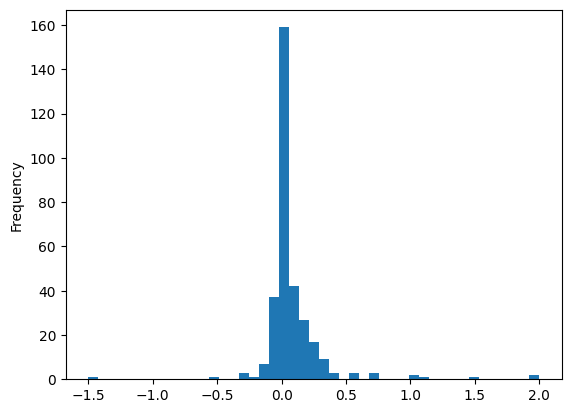

In [201]:
owala_comments_df['key_sentiment'].plot.hist(bins = 45)

Comment: As we can see from the graph, they are tightly squeezed in the neutural areas. When I read about some of the slightly negative comments, I can feel strong nagative emotions from it. e.g.:'This whole situation has me ready to just switch to another brand. Very disappointed in it as well as how they’re handling it.' Score: -0.087. I would personally not use this method for further analysis on comments.

## Sentiment Analysis: Textblob Anaylsis

In [202]:
# We have already created function for it, we will just use the same function to get the score, but this time we will check out subjectivity score too.
#First: Polarity score
owala_comments_df['tb_sentiment'] = owala_comments_df['text'].apply(get_tb_sentiment)
owala_comments_df[['text','key_sentiment','tb_sentiment']][owala_comments_df['tb_sentiment'] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 306
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           62 non-null     object 
 1   key_sentiment  62 non-null     float64
 2   tb_sentiment   62 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [203]:
owala_comments_df[['text','key_sentiment','tb_sentiment']][owala_comments_df['tb_sentiment'] < 0].style

,text,key_sentiment,tb_sentiment
0,The official one in any color you like. You can find it on owalalife.com or on Amazon. I have a black boot for my Black Widow Owala.,0.000000,-0.166667
7,Did you wash it in a dishwasher? I’ve heard that if it’s due to hard water and bothers you that you can wipe it clean with a paper towel and vinegar,-0.032300,-0.016667
9,"Yep. Neptune and Mars. My order ""partially shipped "" today. Not sure which one shipped",0.000000,-0.175000
11,"I ordered Neptune, mars, and whatever the black one is called. For my shipping info a couple days ago but there currently isn’t an expected date.",0.000000,-0.088889
13,Candy Shop base Karate Queen lid. If you just bought it at Dicks Sporting Goods someone swapped the lids on it.,0.000000,-0.800000
14,"Depending on the circumstances of where it came from, did it get lid-swapped? Or franken-ed? That can make an id quite difficult",-0.045500,-0.500000
24,"i have literally glows, i wanted to get this cosmic one, but i’m not sure about it 😭 i don’t need another 32oz",0.000000,-0.250000
26,"This happens to me when I put ice cold water inside. The cold temperature causes the pressure to drop inside the bottle which kinda suctions the lid closed. Similarly if you were to put a hot liquid inside the bottle, the pressure would rise and violently pop the lid open lol",-0.039200,-0.131250
35,$250 for a fucking water bottle that is maybe no more than $60 is absolutely insane!!!,-0.312500,-0.616667
39,People who buy out stock of something as a way to resell to make money are WEIRD.,0.000000,-0.500000


Comment: We can see the number of negative score text increased from 54 to 62. The nagative scores are not close to netural anymore. There are some mistakes like 'won't be disappointed' is still considered a negative thought. not + nagative adjective should be a positive. This probably need to be fixed manually. Sarcasm is still not detected enough.  

<Axes: ylabel='Frequency'>

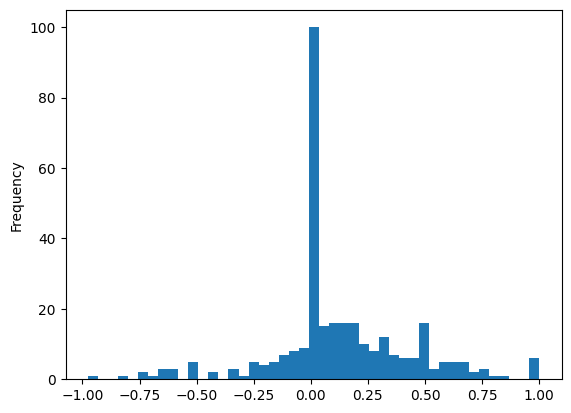

In [204]:
# check out its graph on frequency distribution
owala_comments_df['tb_sentiment'].plot.hist(bins = 45)

Comment: We can see they are more evenly distributed on the graph. Instead of consider everything neutural(used to be 160 at the neutural bar), now there are more high negativity and positivity.

### TextBlob: Subjectivity

In [205]:
# Now We create a function that returns subjectivity using textblob 
def get_tb_sentiment_sub(text):
    tb = TextBlob(text)
    return tb.sentiment[1]
owala_comments_df['tb_sentiment_sub'] = owala_comments_df['text'].apply(get_tb_sentiment_sub)


In [206]:
owala_comments_df[['text','key_sentiment','tb_sentiment','tb_sentiment_sub']][owala_comments_df['tb_sentiment_sub'] > 0.7].style


,text,key_sentiment,tb_sentiment,tb_sentiment_sub
4,It’s real easy to fix.,0.200000,0.650000,1.000000
13,Candy Shop base Karate Queen lid. If you just bought it at Dicks Sporting Goods someone swapped the lids on it.,0.000000,-0.800000,1.000000
14,"Depending on the circumstances of where it came from, did it get lid-swapped? Or franken-ed? That can make an id quite difficult",-0.045500,-0.500000,1.000000
16,Nice upgrade ! I love my 40oz too☺️,0.750000,0.625000,0.800000
21,"It doesn’t seem like it’s TOO bright if that’s what you mean. Mainly, I’m excited to use it for indoor cycling, like HOW COOL!",0.333300,0.300000,0.721875
24,"i have literally glows, i wanted to get this cosmic one, but i’m not sure about it 😭 i don’t need another 32oz",0.000000,-0.250000,0.888889
32,no because i’ve had it in my calendar and been waiting so excitedly and it sells out in under 2 minutes,-0.047600,0.375000,0.750000
34,"owala drops becoming like sneaker drops, owala resellers fr",0.222200,0.450000,0.850000
35,$250 for a fucking water bottle that is maybe no more than $60 is absolutely insane!!!,-0.312500,-0.616667,0.766667
39,People who buy out stock of something as a way to resell to make money are WEIRD.,0.000000,-0.500000,1.000000


In [207]:
owala_comments_df.rename(columns={'tb_sentiment':'c_tb_sentiment'},errors='raise',inplace=True)

Comments: We can clearly see most of the comments with high subjectivity score are not considered neutural. Also we can see these comments are really involved in the topic discussion. I believe one way we can look at this score is to tell if they are strong emotions against the topics. If a topic receive an high average subjectivity score then it could be a hot topic. 

In [208]:
owala_comments_df.head()

,author,score,text,post_id,key_sentiment,c_tb_sentiment,tb_sentiment_sub
0,silver_thunderstorm,2,The official one in any color you like. You ca...,17346hm,0.0000,-0.166667,0.433333
1,citrus_baby,1,a sock,17346hm,0.0000,0.000000,0.000000
2,drjoshm,1,"I just got these ones, and they fit the 24oz n...",17346hm,0.0588,0.500000,0.700000
3,OrdinaryQuestions,7,I've seem multiple posts lately about these bo...,172pa7n,0.0400,0.175000,0.513333
4,AlternativeVisit8038,3,It’s real easy to fix.,172pa7n,0.2000,0.650000,1.000000


In [209]:
owala_post_df.head()

,title,link,author,n_comments,score,text,id,sentiment_score,tb_sentiment,v_sentiment
0,Owala Boot,/r/Owala/comments/17346hm/owala_boot/,yuuki_no_,3,2,Trying to find an owala boot. Any owala boot y...,17346hm,0.0,0.0,0.0000
1,Pissed to say the least,/r/Owala/comments/172pa7n/pissed_to_say_the_le...,Shreksasshole420,7,3,,172pa7n,-0.8,-0.3,-0.6369
2,Water Bottle Residue Inside,/r/Owala/comments/1714gmh/water_bottle_residue...,Pristine-Can-1403,4,1,As you can tell from the picture there is some...,1714gmh,0.0,0.0,0.0000
3,Neptune,/r/Owala/comments/170onc0/neptune/,kimribbean,6,1,Anybody order their Neptune bottle from the “c...,170onc0,0.0,0.0,0.0000
4,Discount/ambassador code,/r/Owala/comments/170kili/discountambassador_c...,Scary_Return_5769,0,1,Does anyone have a ambassador to discount code...,170kili,0.0,0.0,0.0000


In [210]:
owala_comment_sub = owala_comments_df.groupby('post_id').agg({'key_sentiment':'mean','c_tb_sentiment':'mean','tb_sentiment_sub':'mean'})
new_owa = owala_post_df.join(owala_comment_sub,on='id',how='left')
new_owa.head(10)

,title,link,author,n_comments,score,text,id,sentiment_score,tb_sentiment,v_sentiment,key_sentiment,c_tb_sentiment,tb_sentiment_sub
0,Owala Boot,/r/Owala/comments/17346hm/owala_boot/,yuuki_no_,3,2,Trying to find an owala boot. Any owala boot y...,17346hm,0.0000,0.00,0.0000,0.01960,0.111111,0.377778
1,Pissed to say the least,/r/Owala/comments/172pa7n/pissed_to_say_the_le...,Shreksasshole420,7,3,,172pa7n,-0.8000,-0.30,-0.6369,0.08000,0.275000,0.504444
2,Water Bottle Residue Inside,/r/Owala/comments/1714gmh/water_bottle_residue...,Pristine-Can-1403,4,1,As you can tell from the picture there is some...,1714gmh,0.0000,0.00,0.0000,-0.05695,-0.006944,0.478472
3,Neptune,/r/Owala/comments/170onc0/neptune/,kimribbean,6,1,Anybody order their Neptune bottle from the “c...,170onc0,0.0000,0.00,0.0000,0.00000,-0.065972,0.251389
4,Discount/ambassador code,/r/Owala/comments/170kili/discountambassador_c...,Scary_Return_5769,0,1,Does anyone have a ambassador to discount code...,170kili,0.0000,0.00,0.0000,NaN,NaN,NaN
5,what is the best bottle boot for neo sage?,/r/Owala/comments/170eb8y/what_is_the_best_bot...,itssafalsegod,3,1,i was thinking either the mint or the grey/whi...,170eb8y,0.3333,1.00,0.6369,0.17650,0.320000,0.610000
6,help me ID this color,/r/Owala/comments/1708x5p/help_me_id_this_color/,boncuicui,9,10,"can’t find this color name, looked at every IG...",1708x5p,0.4000,0.00,0.4019,-0.02275,-0.650000,1.000000
7,Love my 24oz and upgraded to the 40oz in Iced ...,/r/Owala/comments/16zws3g/love_my_24oz_and_upg...,pineappleapricot,9,18,,16zws3g,0.2727,0.50,0.6369,0.28345,0.542969,0.381250
8,Boot recommendation,/r/Owala/comments/16zve02/boot_recommendation/,Secure_Protection348,6,1,Hi! Does anyone know of any boots that would f...,16zve02,0.0000,0.00,0.0000,0.04840,0.308333,0.495833
9,Cosmic glow in the dark,/r/Owala/comments/16zrz6h/cosmic_glow_in_the_d...,kreezgreez,9,3,I’m wondering if the light blue cosmic glow in...,16zrz6h,0.0000,-0.15,0.0000,0.32976,0.099124,0.600180


<Axes: >

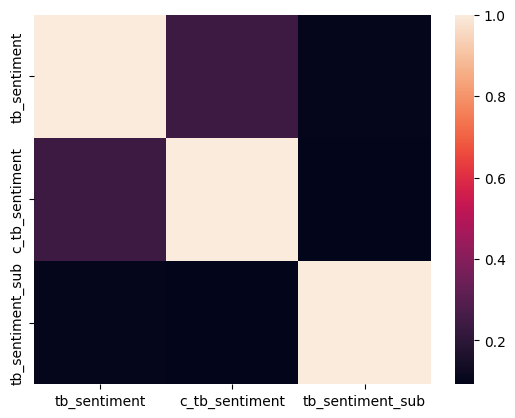

In [211]:
import seaborn as sns
sns.heatmap(new_owa[['tb_sentiment','c_tb_sentiment','tb_sentiment_sub']].corr())

In [212]:
owala_comments_df['text'][owala_comments_df['post_id']=='1708x5p']

13    Candy Shop base Karate Queen lid. If you just ...
14    Depending on the circumstances of where it cam...
Name: text, dtype: object

Comments: I am a little confused right now, I believe I pulled all the comments data but looks like numbers of comments are not match to the record.

In [213]:
new_owa['tb_sentiment_diff'] = np.abs(new_owa['tb_sentiment']-new_owa['c_tb_sentiment'])

In [214]:
new_owa[new_owa['tb_sentiment_diff'] > 0.5]

,title,link,author,n_comments,score,text,id,sentiment_score,tb_sentiment,v_sentiment,key_sentiment,c_tb_sentiment,tb_sentiment_sub,tb_sentiment_diff
1,Pissed to say the least,/r/Owala/comments/172pa7n/pissed_to_say_the_le...,Shreksasshole420,7,3,,172pa7n,-0.8000,-0.30,-0.6369,0.080000,0.275000,0.504444,0.575000
5,what is the best bottle boot for neo sage?,/r/Owala/comments/170eb8y/what_is_the_best_bot...,itssafalsegod,3,1,i was thinking either the mint or the grey/whi...,170eb8y,0.3333,1.00,0.6369,0.176500,0.320000,0.610000,0.680000
6,help me ID this color,/r/Owala/comments/1708x5p/help_me_id_this_color/,boncuicui,9,10,"can’t find this color name, looked at every IG...",1708x5p,0.4000,0.00,0.4019,-0.022750,-0.650000,1.000000,0.650000
16,wah missed lotsa lilac :(,/r/Owala/comments/16yvuic/wah_missed_lotsa_lilac/,civnv,45,20,literally had it in my cart and was checking o...,16yvuic,-0.4000,-0.75,-0.6249,-0.049771,-0.104160,0.427079,0.645840
21,Heatwave Lid Suggestions,/r/Owala/comments/16tzt69/heatwave_lid_suggest...,mdesign816,4,2,Suggestions for other lids? I'm not crazy abou...,16tzt69,0.0000,0.00,0.0000,0.157100,0.593750,0.662500,0.593750
22,Secret Release,/r/Owala/comments/16sblmn/secret_release/,AlternativeVisit8038,25,44,4 beautiful colors were secretly released by O...,16sblmn,0.0000,-0.40,0.0000,0.052550,0.317887,0.509018,0.717887
23,How's my sticker game?,/r/Owala/comments/16sa0j5/hows_my_sticker_game/,creative__bread,6,23,,16sa0j5,0.0000,-0.40,0.0000,0.212500,0.162500,0.237500,0.562500
27,To sticker or not to sticker that is the quest...,/r/Owala/comments/16r4rcz/to_sticker_or_not_to...,kimribbean,5,23,,16r4rcz,0.1154,-0.50,0.6369,0.617000,0.410000,0.602500,0.910000
30,Best Boot Color for 32 oz Voodoo Owala?,/r/Owala/comments/16p601g/best_boot_color_for_...,No-Positive-4219,1,1,Trying to buy a boot for my Whole Foods exclus...,16p601g,0.3750,1.00,0.6369,0.000000,0.000000,0.250000,1.000000
53,Joined the Owala club 😁,/r/Owala/comments/16cio5c/joined_the_owala_club/,AnironSidh,1,10,(Didn't post the first time for some reason) b...,16cio5c,0.0000,0.00,0.4588,-0.500000,-0.750000,0.750000,0.750000


Comments: The difference are not straight forward enough, I will split them to different levels to have a better look

In [215]:
# code source from https://stackoverflow.com/questions/49228596/pandas-case-when-default-in-pandas to understand how to write a 'sql-like case when function', thanks to numpy it was not so hard
new_owa['tb_sentiment_diff_level'] = np.select(
    [
        new_owa['tb_sentiment_diff'].between(0,0.5,inclusive='left'),
        new_owa['tb_sentiment_diff'].between(0.5,1.0,inclusive='left'),
        new_owa['tb_sentiment_diff'].between(1.0,10,inclusive='left')
    ],
    [
        'small',
        'medium',
        'large'
    ],
    default='unknown'
)


In [216]:
new_owa['tb_sentiment_diff_level'].value_counts()

tb_sentiment_diff_level
small      76
medium     12
unknown    11
large       1
Name: count, dtype: int64

In [217]:
#The unknowns are null values due to no comments, so I will replace it with no comments 
new_owa['tb_sentiment_diff_level'].replace('unknown','no comments',inplace=True)

In [218]:
new_owa[new_owa['tb_sentiment_diff_level'] == 'large']

,title,link,author,n_comments,score,text,id,sentiment_score,tb_sentiment,v_sentiment,key_sentiment,c_tb_sentiment,tb_sentiment_sub,tb_sentiment_diff,tb_sentiment_diff_level
30,Best Boot Color for 32 oz Voodoo Owala?,/r/Owala/comments/16p601g/best_boot_color_for_...,No-Positive-4219,1,1,Trying to buy a boot for my Whole Foods exclus...,16p601g,0.375,1.0,0.6369,0.0,0.0,0.25,1.0,large


In [219]:
owala_comments_df['text'][owala_comments_df['post_id'] =='16p601g']

132    https://preview.redd.it/xqqe3r4bztpb1.jpeg?wid...
Name: text, dtype: object

Comment: I could not view the image but image is hard to get a sentiment score with. The only reason why this has a large difference on tb sentiment score is becuase it scores a 1 on post and 0(neutural) on comment due to it's a picture.

In [221]:
new_owa.to_sql('new_owa_1',conn,index=False)


100

In [222]:
cursor.close()
conn.close()


Last comment: I will stop right here because I did not like the data I have on analyzing. Next time when I pull the data I would want to make sure that they have at least 5 comments for each post. Then I can kind of look into the sentiment relation between posts and comments. Please correct me if my thoughts are not right as a data scientist.

# Summary

Write a short summary of what you did and the results here.

#### This week I did further analysis on the sentiment analysis with my owala post data and comment data using three different methods: keyword analysis, textblob polarity sentiment, vader polarirty sentiment. Obviously people share more neutural posts and comments. But by only comparing the number negative posts and positive posts, we would find that there are most postivie posts related than negative ones. For majority of the posts, their comments shares similar level of polarity (Within 0.5 difference range, maybe I should lower this range). 

#### I also slightly went into subjectivity and its relations with polarity scores. The heatmap shows that it is completely irrelated to polarity scores. Thus I gave up on doing further analysis on the relations between these. 

#### My Personal Favorite sentiment analysis tool is vader. I believe it gave the most reasonable sentiment score to the titles. The fact it includes capitalization and emojis is a big feature for nowaday social media analysis. Even though it still does not do well with sarcasm and new meanings of words given from the mordern world. But I belive we can add these rules to it manually based of its algorithms. 

#### I have learned a lot doing the past two weeks' assignment. It really brought me into the NLP world and I would definitely put more work on these in 650's week 6 and week 7 class. Thank you Christy.

